In [1]:
import json
import matplotlib 
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## define some colors 
COLORS = (
    [
        # personal color
        '#313695',  # DARK BLUE
        '#74add1',  # LIGHT BLUE
        '#f46d43',  # ORANGE
        '#4daf4a',  # GREEN
        '#984ea3',  # PURPLE
        '#f781bf',  # PINK
        '#ffc832',  # YELLOW
        '#000000',  # BLACK
        # deepmind style
        '#0072B2',
        '#009E73',
        '#D55E00',
        '#CC79A7',
        '#d73027',  # RED
        # built-in color
        'blue',
        'red',
        'pink',
        'cyan',
        'magenta',
        'yellow',
        'black',
        'purple',
        'brown',
        'orange',
        'teal',
        'lightblue',
        'lime',
        'lavender',
        'turquoise',
        'darkgreen',
        'tan',
        'salmon',
        'gold',
        'darkred',
        'darkblue',
        'green'
    ]
)

In [3]:
# read rewards for ddqn at different seeds
reward_ddqn_0 = json.load(open('ddqn-rc-reward-0.json', 'r'))
reward_ddqn_1 = json.load(open('ddqn-rc-reward-1.json', 'r'))
reward_ddqn_2 = json.load(open('ddqn-rc-reward-2.json', 'r'))
d = {'0': reward_ddqn_0, '1': reward_ddqn_1, '2': reward_ddqn_2}
rewards_ddqn = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
rewards_ddqn['mean'] = rewards_ddqn.mean(axis=1)
rewards_ddqn['std'] = rewards_ddqn.std(axis=1)

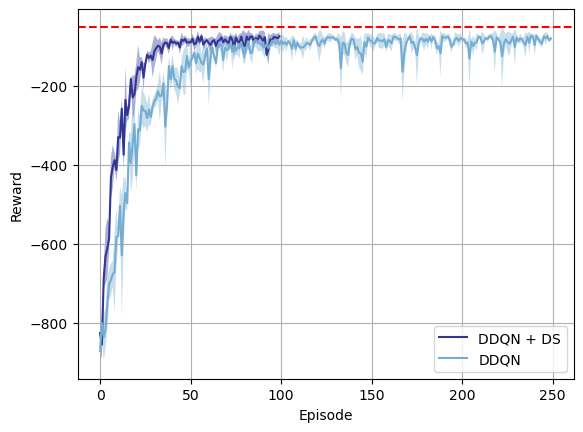

In [4]:
reward_ddqn_mb0 = json.load(open('ddqn-rc-dyna-lssm-reward-0.json', 'r'))
reward_ddqn_mb1 = json.load(open('ddqn-rc-dyna-lssm-reward-1.json', 'r'))
reward_ddqn_mb2 = json.load(open('ddqn-rc-dyna-lssm-reward-2.json', 'r'))

d = {'0': reward_ddqn_mb0, '1': reward_ddqn_mb1, '2': reward_ddqn_mb2}
rewards_ddqn_mb = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
rewards_ddqn_mb['mean'] = rewards_ddqn_mb.mean(axis=1)
rewards_ddqn_mb['std'] = rewards_ddqn_mb.std(axis=1)

reward_threshold = -50
fig, ax = plt.subplots()
ax.axhline(y=reward_threshold, color='r', linestyle='--')
ax.plot(rewards_ddqn_mb.index, rewards_ddqn_mb['mean'], label='DDQN + DS', color=COLORS[0])
ax.plot(rewards_ddqn.index, rewards_ddqn['mean'], label='DDQN', color=COLORS[1])
ax.fill_between(rewards_ddqn_mb.index,
                rewards_ddqn_mb['mean'] + rewards_ddqn_mb['std'],
                rewards_ddqn_mb['mean'] - rewards_ddqn_mb['std'], 
                alpha=.4, 
                fc=COLORS[0], 
                lw=0)
ax.fill_between(rewards_ddqn.index,
                rewards_ddqn['mean'] + rewards_ddqn['std'],
                rewards_ddqn['mean'] - rewards_ddqn['std'], 
                alpha=.4, 
                fc=COLORS[1], 
                lw=0)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
ax.legend()


In [5]:
# some post processing
